In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from yellowbrick.classifier import ConfusionMatrix
from sklearn.neural_network import MLPClassifier
import pickle


In [21]:
model_path = 'model.sav'
df = pd.read_csv("creditcard.csv")

In [4]:
#first 6 rows from data frame
#the inout values are the V columns
#the variable of interest is Class column - (0 non fraud - 1 fraud)
#data set from kagle (https://www.kaggle.com/mlg-ulb/creditcardfraud/data#) 
df.head(6)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0


In [5]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [6]:
input_columns = df.iloc[:,1:30].columns
outout_columns = df.iloc[:, 30:].columns

In [7]:
print(input_columns)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')


In [8]:
print(outout_columns)

Index(['Class'], dtype='object')


In [9]:
#getting the input (x data) and the output (y data) data
input_data = df[input_columns]
output_data = df[outout_columns]

In [10]:
train_input, test_input, train_output, test_output = train_test_split(input_data, output_data, train_size=0.8, test_size=0.2, random_state=1)
train_input = (train_input-train_input.mean())/train_input.std()
test_input = (test_input-test_input.mean())/test_input.std()
train_input = train_input.values
train_output = train_output.values.flatten()
test_input = test_input.values
test_output = test_output.values.flatten()

In [11]:
model_LR = LogisticRegression(random_state=1)
model_LR.fit(train_input, train_output)

LogisticRegression(random_state=1)

In [12]:
prediction_over_test = model_LR.predict(test_input)

In [13]:
print(f'accuracy_score = {accuracy_score(test_output, prediction_over_test)}')
print(f'f1_socre = {f1_score(test_output, prediction_over_test)}')
print(f'precision_score = {precision_score(test_output, prediction_over_test)}')
print(f'recall_score = {recall_score(test_output, prediction_over_test)}')

accuracy_score = 0.9991397773954567
f1_socre = 0.6620689655172414
precision_score = 0.8275862068965517
recall_score = 0.5517241379310345


0.9991397773954567

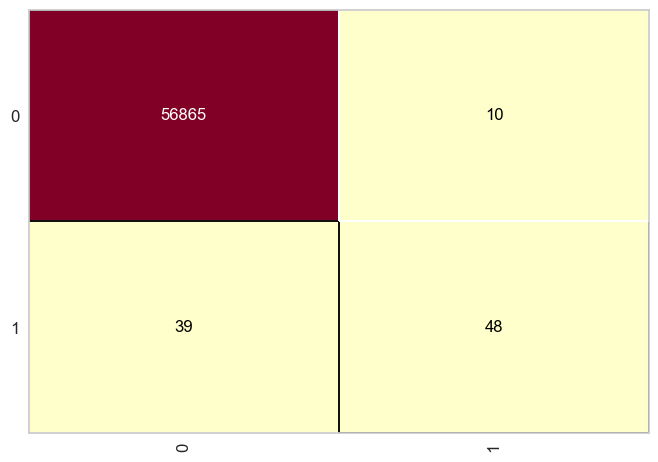

In [14]:
cm = ConfusionMatrix(model_LR)
cm.fit(train_input, train_output)
cm.score(test_input, test_output)

In [16]:
model_mlp = MLPClassifier(max_iter=1500, tol=0.00001, verbose=True, hidden_layer_sizes=(25,25), solver='adam', activation='logistic', random_state=1)
model_mlp.fit(train_input, train_output)

Iteration 1, loss = 0.04290866
Iteration 2, loss = 0.00869957
Iteration 3, loss = 0.00761672
Iteration 4, loss = 0.00629233
Iteration 5, loss = 0.00454601
Iteration 6, loss = 0.00333434
Iteration 7, loss = 0.00298248
Iteration 8, loss = 0.00287963
Iteration 9, loss = 0.00281005
Iteration 10, loss = 0.00276709
Iteration 11, loss = 0.00272076
Iteration 12, loss = 0.00268055
Iteration 13, loss = 0.00267327
Iteration 14, loss = 0.00264586
Iteration 15, loss = 0.00260722
Iteration 16, loss = 0.00259401
Iteration 17, loss = 0.00255488
Iteration 18, loss = 0.00249681
Iteration 19, loss = 0.00248218
Iteration 20, loss = 0.00245007
Iteration 21, loss = 0.00240087
Iteration 22, loss = 0.00238236
Iteration 23, loss = 0.00235334
Iteration 24, loss = 0.00232586
Iteration 25, loss = 0.00230891
Iteration 26, loss = 0.00228931
Iteration 27, loss = 0.00225645
Iteration 28, loss = 0.00225374
Iteration 29, loss = 0.00222429
Iteration 30, loss = 0.00219482
Iteration 31, loss = 0.00218518
Iteration 32, los

MLPClassifier(activation='logistic', hidden_layer_sizes=(25, 25), max_iter=1500,
              tol=1e-05, verbose=True)

In [17]:
prediction_over_test = model_mlp.predict(test_input)

In [18]:
print(f'accuracy_score = {accuracy_score(test_output, prediction_over_test)}')
print(f'f1_socre = {f1_score(test_output, prediction_over_test)}')
print(f'precision_score = {precision_score(test_output, prediction_over_test)}')
print(f'recall_score = {recall_score(test_output, prediction_over_test)}')

accuracy_score = 0.9993504441557529
f1_socre = 0.7730061349693252
precision_score = 0.8289473684210527
recall_score = 0.7241379310344828


0.9993504441557529

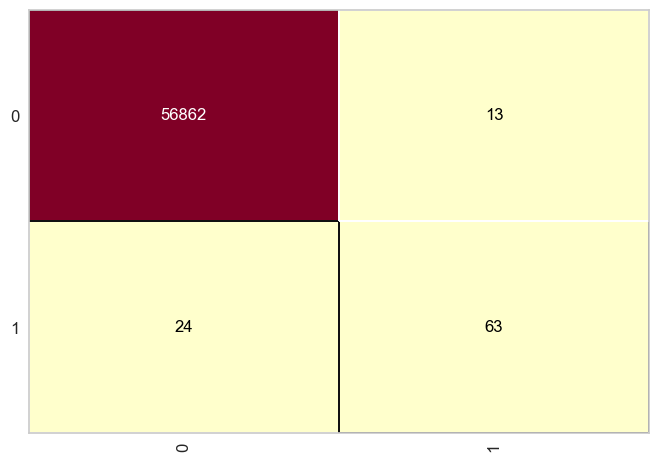

In [19]:
cm = ConfusionMatrix(model_mlp)
cm.fit(train_input, train_output)
cm.score(test_input, test_output)

In [22]:
pickle.dump(model_mlp, open(model_path, 'wb')) 

In [26]:
df_input_producer = pd.DataFrame(test_input, columns=input_columns)
df_input_producer.to_csv("input_producer.csv", sep=";")

In [27]:
df_input_producer.head(3)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.318582,-0.460479,-0.107158,-0.162198,1.479558,-1.521378,0.251546,-0.451298,0.320564,0.063632,...,-0.260489,-0.107992,0.058678,0.583635,0.041931,-4.277719,-0.422213,0.167403,0.740120,-0.341486
1,-0.422970,0.802057,0.881693,0.015947,-0.197957,-0.493717,0.275565,0.374776,-0.651301,-0.564972,...,-0.014363,-0.181804,-0.513412,0.140290,0.668144,-0.503967,0.162992,0.411195,0.205819,-0.340740
2,-0.167626,0.680815,0.641328,-0.093085,0.421605,-0.402303,0.593529,-0.056733,-0.430890,-0.497188,...,0.268708,-0.426112,-1.074502,-0.187609,-0.818748,-0.036235,0.248267,0.631343,0.315041,-0.345020
